In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_happy_2019 = pd.read_csv("2019.csv")

df_happy_2019.head() # ilk beş satır

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
df_happy_2019.sort_values("Score", ascending=False).head(10) # 2019 da En mutlu 10 ülkeyi listeliyoruz.

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


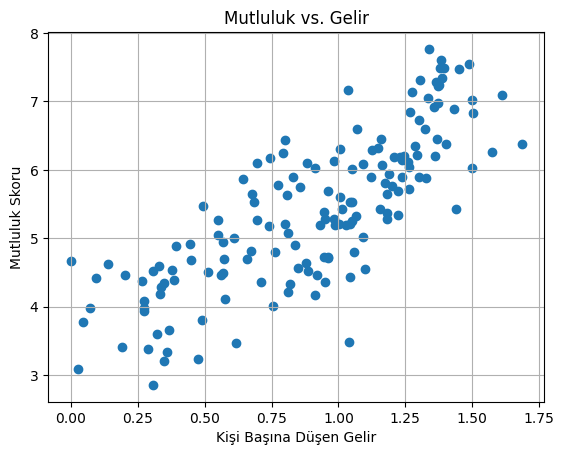

In [20]:
#2019 Kişi başına düşen gelir ve mutluluk ilişkisi. Gelir arttıkça mutluluk seviyesinin arttığını görüyoruz. 
plt.scatter(df_happy_2019["GDP per capita"], df_happy_2019["Score"])
plt.xlabel("Kişi Başına Düşen Gelir")
plt.ylabel("Mutluluk Skoru")
plt.title("Mutluluk vs. Gelir")
plt.grid(True)
plt.show()

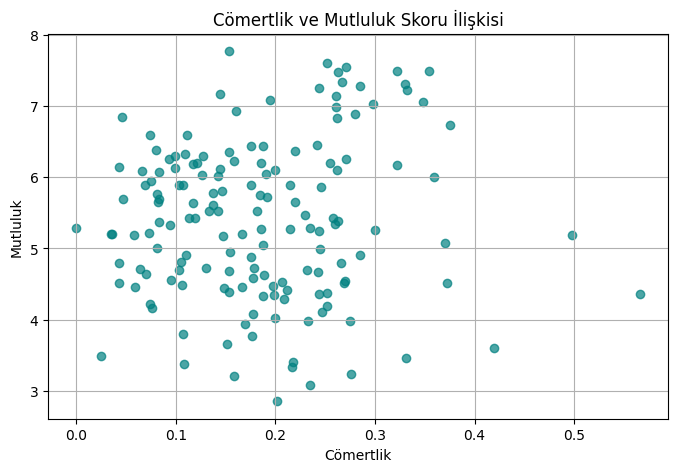

In [24]:
# Cömertlik vs Mutluluk Skoru. Cömertlik arttıkça mutluluk artar mı ? 
plt.figure(figsize=(8, 5))
plt.scatter(df_happy_2019['Generosity'], df_happy_2019['Score'], color='teal', alpha=0.7)

plt.xlabel("Cömertlik")
plt.ylabel("Mutluluk")
plt.title("Cömertlik ve Mutluluk Skoru İlişkisi")
plt.grid(True)
plt.show()

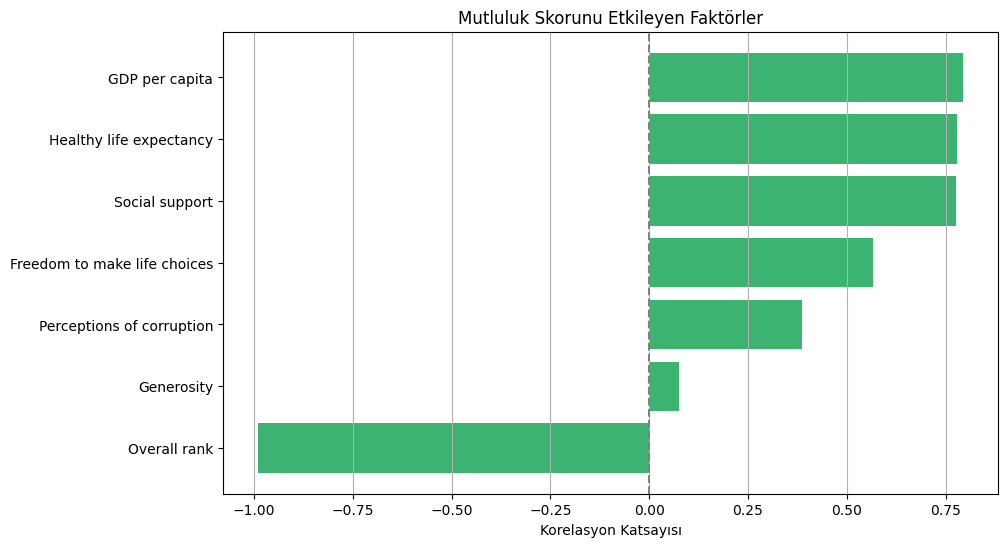

In [26]:
# Korelasyonları hesaplıyoruz
corr_with_score = df_happy_2019.corr(numeric_only=True)['Score'].drop('Score').sort_values()

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(corr_with_score.index, corr_with_score.values, color='mediumseagreen')

plt.xlabel("Korelasyon Katsayısı")
plt.title("Mutluluk Skorunu Etkileyen Faktörler")
plt.grid(axis='x')
plt.axvline(0, color='gray', linestyle='--')  # 0 çizgisi
plt.show()

In [27]:
#Geliri düşük ama mutlu ülkeleri listeliyoruz.
df_happy_2019[df_happy_2019['GDP per capita'] < df_happy_2019['GDP per capita'].mean()]\
    .sort_values('Score', ascending=False).head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
26,27,Guatemala,6.436,0.800,1.269,0.746,0.535,0.175,0.078
34,35,El Salvador,6.253,0.794,1.242,0.789,0.430,0.093,0.074
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240
44,45,Nicaragua,6.105,0.694,1.325,0.835,0.435,0.200,0.127
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
55,56,Jamaica,5.890,0.831,1.478,0.831,0.490,0.107,0.028
58,59,Honduras,5.860,0.642,1.236,0.828,0.507,0.246,0.078
60,61,Bolivia,5.779,0.776,1.209,0.706,0.511,0.137,0.064
62,63,Paraguay,5.743,0.855,1.475,0.777,0.514,0.184,0.080
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.220,0.098


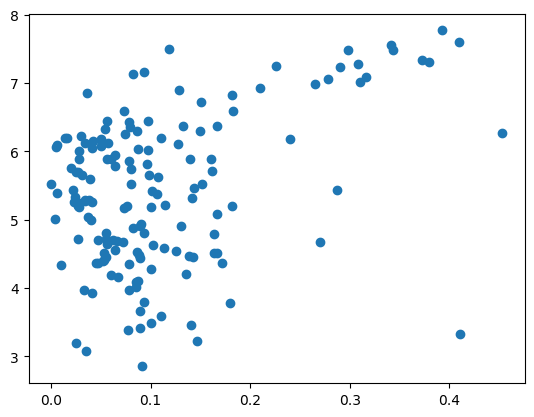

In [29]:
#Yolsuzluk vs mutluluk ilişkisi
plt.scatter(df_happy_2019['Perceptions of corruption'], df_happy_2019['Score'])